# Prediction of text with Nexa Letter Latency.
This notbook is for seeing how much the delay between the code vector and the code is related to the accuaracy of the prediciton.

In [1]:
import numpy as np
import h5py
from sklearn import svm, cross_validation
from sklearn.naive_bayes import MultinomialNB

### Load the data

In [2]:
# First we load the file 
file_location = '../results_database/text_wall_street_big.hdf5'
f = h5py.File(file_location, 'r')

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

# Load the particular example
Nspatial_clusters = 5
Ntime_clusters = 15
Nembedding = 3

run_name = '/low-resolution'
parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]

# Now we load the time and the code vectors
time = nexa['time']
code_vectors = nexa['code-vectors']
code_vectors_distance = nexa['code-vectors-distance']
code_vectors_softmax = nexa['code-vectors-softmax']
code_vectors_winner = nexa['code-vectors-winner']

### Make the predictions


In [3]:
delays = np.arange(0, 20)
accuracy = []

Make the prediction for each delay. This **takes a bit**

In [4]:
N = 50000  # Amount of data
delays = np.arange(0, 10)
accuracy = []

# Make prediction with scikit-learn
for delay in delays:
    X = code_vectors_winner[:(N - delay)]
    y = letters_sequence[delay:N]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf = svm.SVC(C=1.0, cache_size=200, kernel='linear')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100.0
    accuracy.append(score)
    print('delay', delay)
    print('score', score)


delay 0
score 26.1
delay 1
score 61.42
delay 2
score 65.64
delay 3
score 70.94
delay 4
score 69.98
delay 5
score 86.08
delay 6
score 29.0
delay 7
score 20.28
delay 8
score 19.2
delay 9
score 18.36


#### Plot it

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


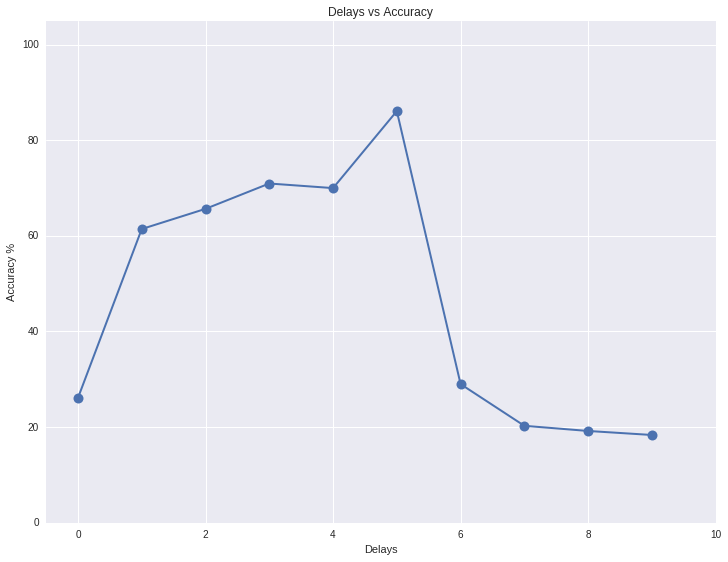

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(delays, accuracy, 'o-', lw=2, markersize=10)
plt.xlabel('Delays')
plt.ylim([0, 105])
plt.xlim([-0.5, 10])
plt.ylabel('Accuracy %')
plt.title('Delays vs Accuracy')
fig = plt.gcf()
fig.set_size_inches((12, 9))

### Make predictions with representation standarization

In [6]:
from sklearn import preprocessing

In [7]:
N = 50000  # Amount of data
delays = np.arange(0, 10)
accuracy_normalized = []

# Make prediction with scikit-learn
for delay in delays:
    X = code_vectors_winner[:(N - delay)]
    y = letters_sequence[delay:N]
    X = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf = svm.SVC(C=1.0, cache_size=200, kernel='linear')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100.0
    accuracy_normalized.append(score)
    print('delay', delay)
    print('score', score)

delay 0
score 25.78
delay 1
score 60.44
delay 2
score 66.24
delay 3
score 71.0
delay 4
score 69.58
delay 5
score 85.16
delay 6
score 28.16
delay 7
score 20.34
delay 8
score 18.68
delay 9
score 18.54


#### Plot it

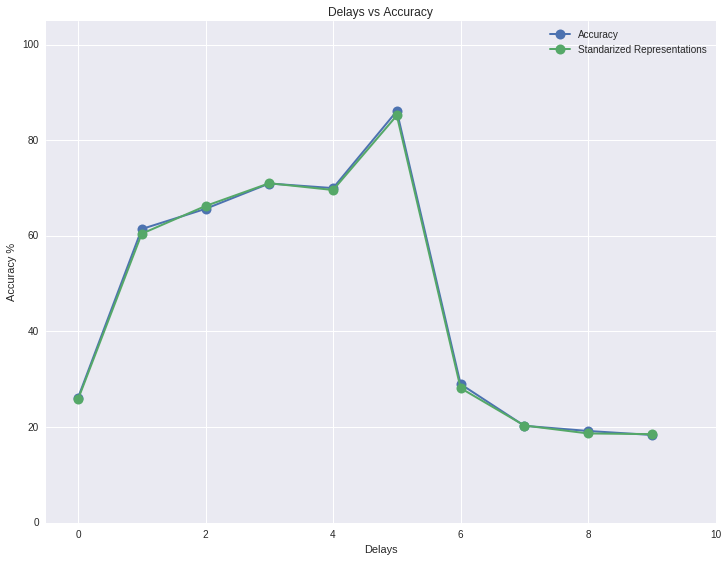

In [12]:
plt.plot(delays, accuracy, 'o-', lw=2, markersize=10., label='Accuracy')
plt.plot(delays, accuracy_normalized, 'o-', lw=2, markersize=10, label='Standarized Representations')
plt.xlabel('Delays')
plt.ylim([0, 105])
plt.xlim([-0.5, 10])
plt.ylabel('Accuracy %')
plt.title('Delays vs Accuracy')
fig = plt.gcf()
fig.set_size_inches((12, 9))
plt.legend()